In [409]:
library(tidyverse)
library(rlist)
library(pipeR)

options(repr.matrix.max.cols=180, repr.matrix.max.rows=150)

In [410]:
train <- read_csv('../input/train.csv', col_types = cols())
test <- read_csv('../input/test.csv', col_types = cols())

train_x <- train %>% select(!y)
train_y <- train$y
test_x <- test

In [411]:
# train_test <- train
train_test <- bind_rows(train_x, test_x)

In [412]:
train_test %>% nrow()

[1] 74111

In [413]:
train_test %>% head(2) 

id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<date>,<lgl>,<lgl>,<chr>,<date>,<lgl>,<date>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector""}",2,Real Bed,1,4,flexible,LA,TRUE,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,2016-07-27,TRUE,FALSE,NA,2016-07-13,FALSE,2016-07-27,33.78893,-118.15476,The Penthouse,NA,1,Apartment,60,Private room,NA,90804
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",1,Real Bed,1,1,strict,DC,TRUE,"This is a new listing for a lovely guest bedroom in Brookland near Catholic University. Has attached sitting area and big closet. Suburban feel in urban city Access to hall guest bathroom, laundry, kitchen and common areas Totally up to you Wonderful location, sitting on the front porch drinking my coffee. Brookland metro stop (redline) is less than a mile in the same street. Bus stop is one block away.",2016-09-12,TRUE,TRUE,100%,2015-12-30,FALSE,2017-03-31,38.93481,-76.97819,Guest Bedroom in Brookland,Brookland,9,House,100,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-623c-4b5d-8186-f4f855d66cf2.jpg?aki_policy=small,20018


In [414]:
# 不要な記号を削除
train_test <- train_test %>% 
  mutate(amenities = str_remove_all(amenities, "\\{|\\}") %>%
         str_remove_all('"') %>% 
         str_replace_all(" ", "_") %>% 
         str_replace_all("/", "_") %>% 
         str_replace_all("&", "and") %>% 
         str_replace_all("'", "_") %>% 
         str_replace_all("\\(", "_") %>% 
         str_replace_all("\\)", "_") %>%
         str_replace_all(":", "_"))

In [415]:
# amenityの列を分解してamenitiesの各項目ごと一行のデータフレームを作成

In [416]:
temp <- train_test %>% 
  select(id, description, amenities) 

In [417]:
temp %>% head()

id,description,amenities
<dbl>,<chr>,<chr>
0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,"TV,Wireless_Internet,Kitchen,Free_parking_on_premises,Washer,Dryer,Smoke_detector"
1,"This is a new listing for a lovely guest bedroom in Brookland near Catholic University. Has attached sitting area and big closet. Suburban feel in urban city Access to hall guest bathroom, laundry, kitchen and common areas Totally up to you Wonderful location, sitting on the front porch drinking my coffee. Brookland metro stop (redline) is less than a mile in the same street. Bus stop is one block away.","TV,Cable_TV,Internet,Wireless_Internet,Air_conditioning,Kitchen,Free_parking_on_premises,Heating,Washer,Dryer,Smoke_detector,Carbon_monoxide_detector,First_aid_kit,Essentials,Shampoo,Lock_on_bedroom_door,24-hour_check-in,Hangers,Iron,Laptop_friendly_workspace,translation_missing__en.hosting_amenity_49,translation_missing__en.hosting_amenity_50"
2,"We're looking forward to your stay at our apt. It's located 1 block from the J train (18 mins from Manhattan) and 2 blocks from: Grocery Stores, Deli's, Dollar Stores and Restaurants. It doesn't get much more convenient than this. The apartment was recently renovated so everything is new and modern. We have a regular cleaning service and everything you'll need to feel comfortable. Did I mention we have access to a huge backyard?!?! It's great for summer cookouts!","TV,Internet,Wireless_Internet,Kitchen,Indoor_fireplace,Buzzer_wireless_intercom,Heating,Washer,Dryer,Smoke_detector,Carbon_monoxide_detector,First_aid_kit,Safety_card,Fire_extinguisher,Essentials,Shampoo,Lock_on_bedroom_door,24-hour_check-in,Hangers,Hair_dryer,Iron,Laptop_friendly_workspace,translation_missing__en.hosting_amenity_49,translation_missing__en.hosting_amenity_50,Self_Check-In,Keypad,Lockbox,Bathtub,Room-darkening_shades"
3,"BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - - ARCADE TABLE w/50+ GAMES - - 55"" 4K TV w/surround sound - -PRIVATE BATHROOM -- FULL EQUIPPED CHEF'S KITCHEN - - NESPRESSO MACHINE - - LOCATION: FiDi, North Beach, Polk St, Chinatown all walking distance Private master bedroom with private bathroom in an apartment with two other bedrooms. You'll have your own private bathroom and shower in the room. There's a view of the Bay Bridge right from your bed when you wake up and sky lights to keep the room airy and light during the day. Please also check out my other listing: https://www.airbnb.com/rooms/545585 Access to the private room and all shared living spaces such as the chef kitchen with views of the Bay Bridge while you cook + roof deck and grill. This is the best room in the house! This is a shared room in an apartment with 3 fun working professionals in their late 20s. We're constantly travelling and work different hours, so chances are you won't see us all at once. There are two bath","TV,Cable_TV,Internet,Wireless_Internet,Air_conditioning,Kitchen,Buzzer_wireless_intercom,Heating,Washer,Dryer,Smoke_detector,Carbon_monoxide_detector,First_aid_kit,Safety_card,Essentials,Shampoo,Self_Check-In,Keypad"
4,"Charming Apartment on the upper west side of Manhattan! Located between Broadway and Central Park. Blocks from the Natural History Museum and Central Park Reservoir/Great Lawn. Close to 3 major subway lines and cross town bus. Located in the heart of the Upper West Side, in a pre-war building - located less than 1 block away from Central Park. Cafes, museums and shops are literally right on the corner when you step outside. I will provide you with keys to the outside front door and apartment during your stay. Sheets, blankets, comforters, towels, and pillows are available. A blow dryer is

In [418]:
l <- str_split(temp$amenities, ",")

In [419]:
l %>%  head()

[[1]]
[1] "TV"                       "Wireless_Internet"       
[3] "Kitchen"                  "Free_parking_on_premises"
[5] "Washer"                   "Dryer"                   
[7] "Smoke_detector"          

[[2]]
 [1] "TV"                                        
 [2] "Cable_TV"                                  
 [3] "Internet"                                  
 [4] "Wireless_Internet"                         
 [5] "Air_conditioning"                          
 [6] "Kitchen"                                   
 [7] "Free_parking_on_premises"                  
 [8] "Heating"                                   
 [9] "Washer"                                    
[10] "Dryer"                                     
[11] "Smoke_detector"                            
[12] "Carbon_monoxide_detector"                  
[13] "First_aid_kit"                             
[14] "Essentials"                                
[15] "Shampoo"                                   
[16] "Lock_on_bedroom_door"                      
[17] "24-hour_check-in"                          
[18] "Hangers"                                   
[19] "Iron"                                      
[20] "Laptop_friendly_workspace"                 
[21] "translation_missing__en.hosting_amenity_49"
[22] "translation_missing__en.hosting_amenity_50"

[[3]]
 [1] "TV"                                        
 [2] "Internet"                                  
 [3] "Wireless_Internet"                         
 [4] "Kitchen"                                   
 [5] "Indoor_fireplace"                          
 [6] "Buzzer_wireless_intercom"                  
 [7] "Heating"                                   
 [8] "Washer"                                    
 [9] "Dryer"                                     
[10] "Smoke_detector"                            
[11] "Carbon_monoxide_detector"                  
[12] "First_aid_kit"                             
[13] "Safety_card"                               
[14] "Fire_extinguisher"                         
[15] "Essentials"                                
[16] "Shampoo"                                   
[17] "Lock_on_bedroom_door"                      
[18] "24-hour_check-in"                          
[19] "Hangers"                                   
[20] "Hair_dryer"                                
[21] "Iron"                                      
[22] "Laptop_friendly_workspace"                 
[23] "translation_missing__en.hosting_amenity_49"
[24] "translation_missing__en.hosting_amenity_50"
[25] "Self_Check-In"                             
[26] "Keypad"                                    
[27] "Lockbox"                                   
[28] "Bathtub"                                   
[29] "Room-darkening_shades"                     

[[4]]
 [1] "TV"                       "Cable_TV"                
 [3] "Internet"                 "Wireless_Internet"       
 [5] "Air_conditioning"         "Kitchen"                 
 [7] "Buzzer_wireless_intercom" "Heating"                 
 [9] "Washer"                   "Dryer"                   
[11] "Smoke_detector"           "Carbon_monoxide_detector"
[13] "First_aid_kit"            "Safety_card"             
[15] "Essentials"               "Shampoo"                 
[17] "Self_Check-In"            "Keypad"                  

[[5]]
 [1] "TV"                       "Internet"                
 [3] "Wireless_Internet"        "Air_conditioning"        
 [5] "Kitchen"                  "Elevator"                
 [7] "Buzzer_wireless_intercom" "Heating"                 
 [9] "Washer"                   "Dryer"                   
[11] "Smoke_detector"           "Carbon_monoxide_detector"
[13] "Safety_card"              "Fire_extinguisher"       
[15] "Essentials"               "Shampoo"                 
[17] "Hangers"                  "Hair_dryer"              

[[6]]
 [1] "Wireless_Internet"                         
 [2] "Air_conditioning"                          
 [3] "Kitchen"                            

In [420]:
temp_long <- data.frame(
  id = rep(temp$id, sapply(l, length)),
  description = rep(temp$description, sapply(l, length)),
  amenities_div = unlist(l)
)

In [421]:
temp_long %>% head(10)

,id,description,amenities_div
,<dbl>,<fct>,<fct>
1,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,TV
2,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Wireless_Internet
3,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Kitchen
4,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Free_parking_on_premises
5,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Washer
6,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Dryer
7,0,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,Smoke_detector
8,1,"This is a new listing for a lovely guest bedroom in Brookland near Catholic University. Has attached sitting area and big closet. Suburban feel in urban city Access to hall guest bathroom, laundry, kitchen and common areas Totally up to you Wonderful location, sitting on the front porch drinking my coffee. Brookland metro stop (redline) is less than a mile in the same street. Bus stop is one block away.",TV
9,1,"This is a new listing for a lovely guest bedroom in Brookland near Catholic University. Has attached sitting area and big closet. Suburban feel in urban city Access to hall guest bathroom, laundry, kitchen and common areas Totally up to you Wonderful location, sitting on the front porch drinking my coffee. Brookland metro stop (redline) is less than a mile in the same street. Bus stop is one block away.",Cable_TV


In [422]:
temp_long <- temp_long %>% 
  dplyr::filter(amenities_div != "") %>%
  distinct() 

In [423]:
# 基のデータフレームと結合
train_test_long <- train_test %>% 
  left_join(temp_long, by = c("id" = "id", "description" = "description")) %>%
  select(!amenities) %>% 
  transform(amenities_div = as.character(amenities_div))
  

In [424]:
train_test_long %>% head(2)

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,amenities_div
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<date>,<lgl>,<lgl>,<chr>,<date>,<lgl>,<date>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0,6,2,Real Bed,1,4,flexible,LA,TRUE,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,2016-07-27,TRUE,FALSE,NA,2016-07-13,FALSE,2016-07-27,33.78893,-118.1548,The Penthouse,NA,1,Apartment,60,Private room,NA,90804,TV
2,0,6,2,Real Bed,1,4,flexible,LA,TRUE,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,2016-07-27,TRUE,FALSE,NA,2016-07-13,FALSE,2016-07-27,33.78893,-118.1548,The Penthouse,NA,1,Apartment,60,Private room,NA,90804,Wireless_Internet


In [425]:
# yに効きそうなamenitiesを探す

`summarise()` ungrouping output (override with `.groups` argument)



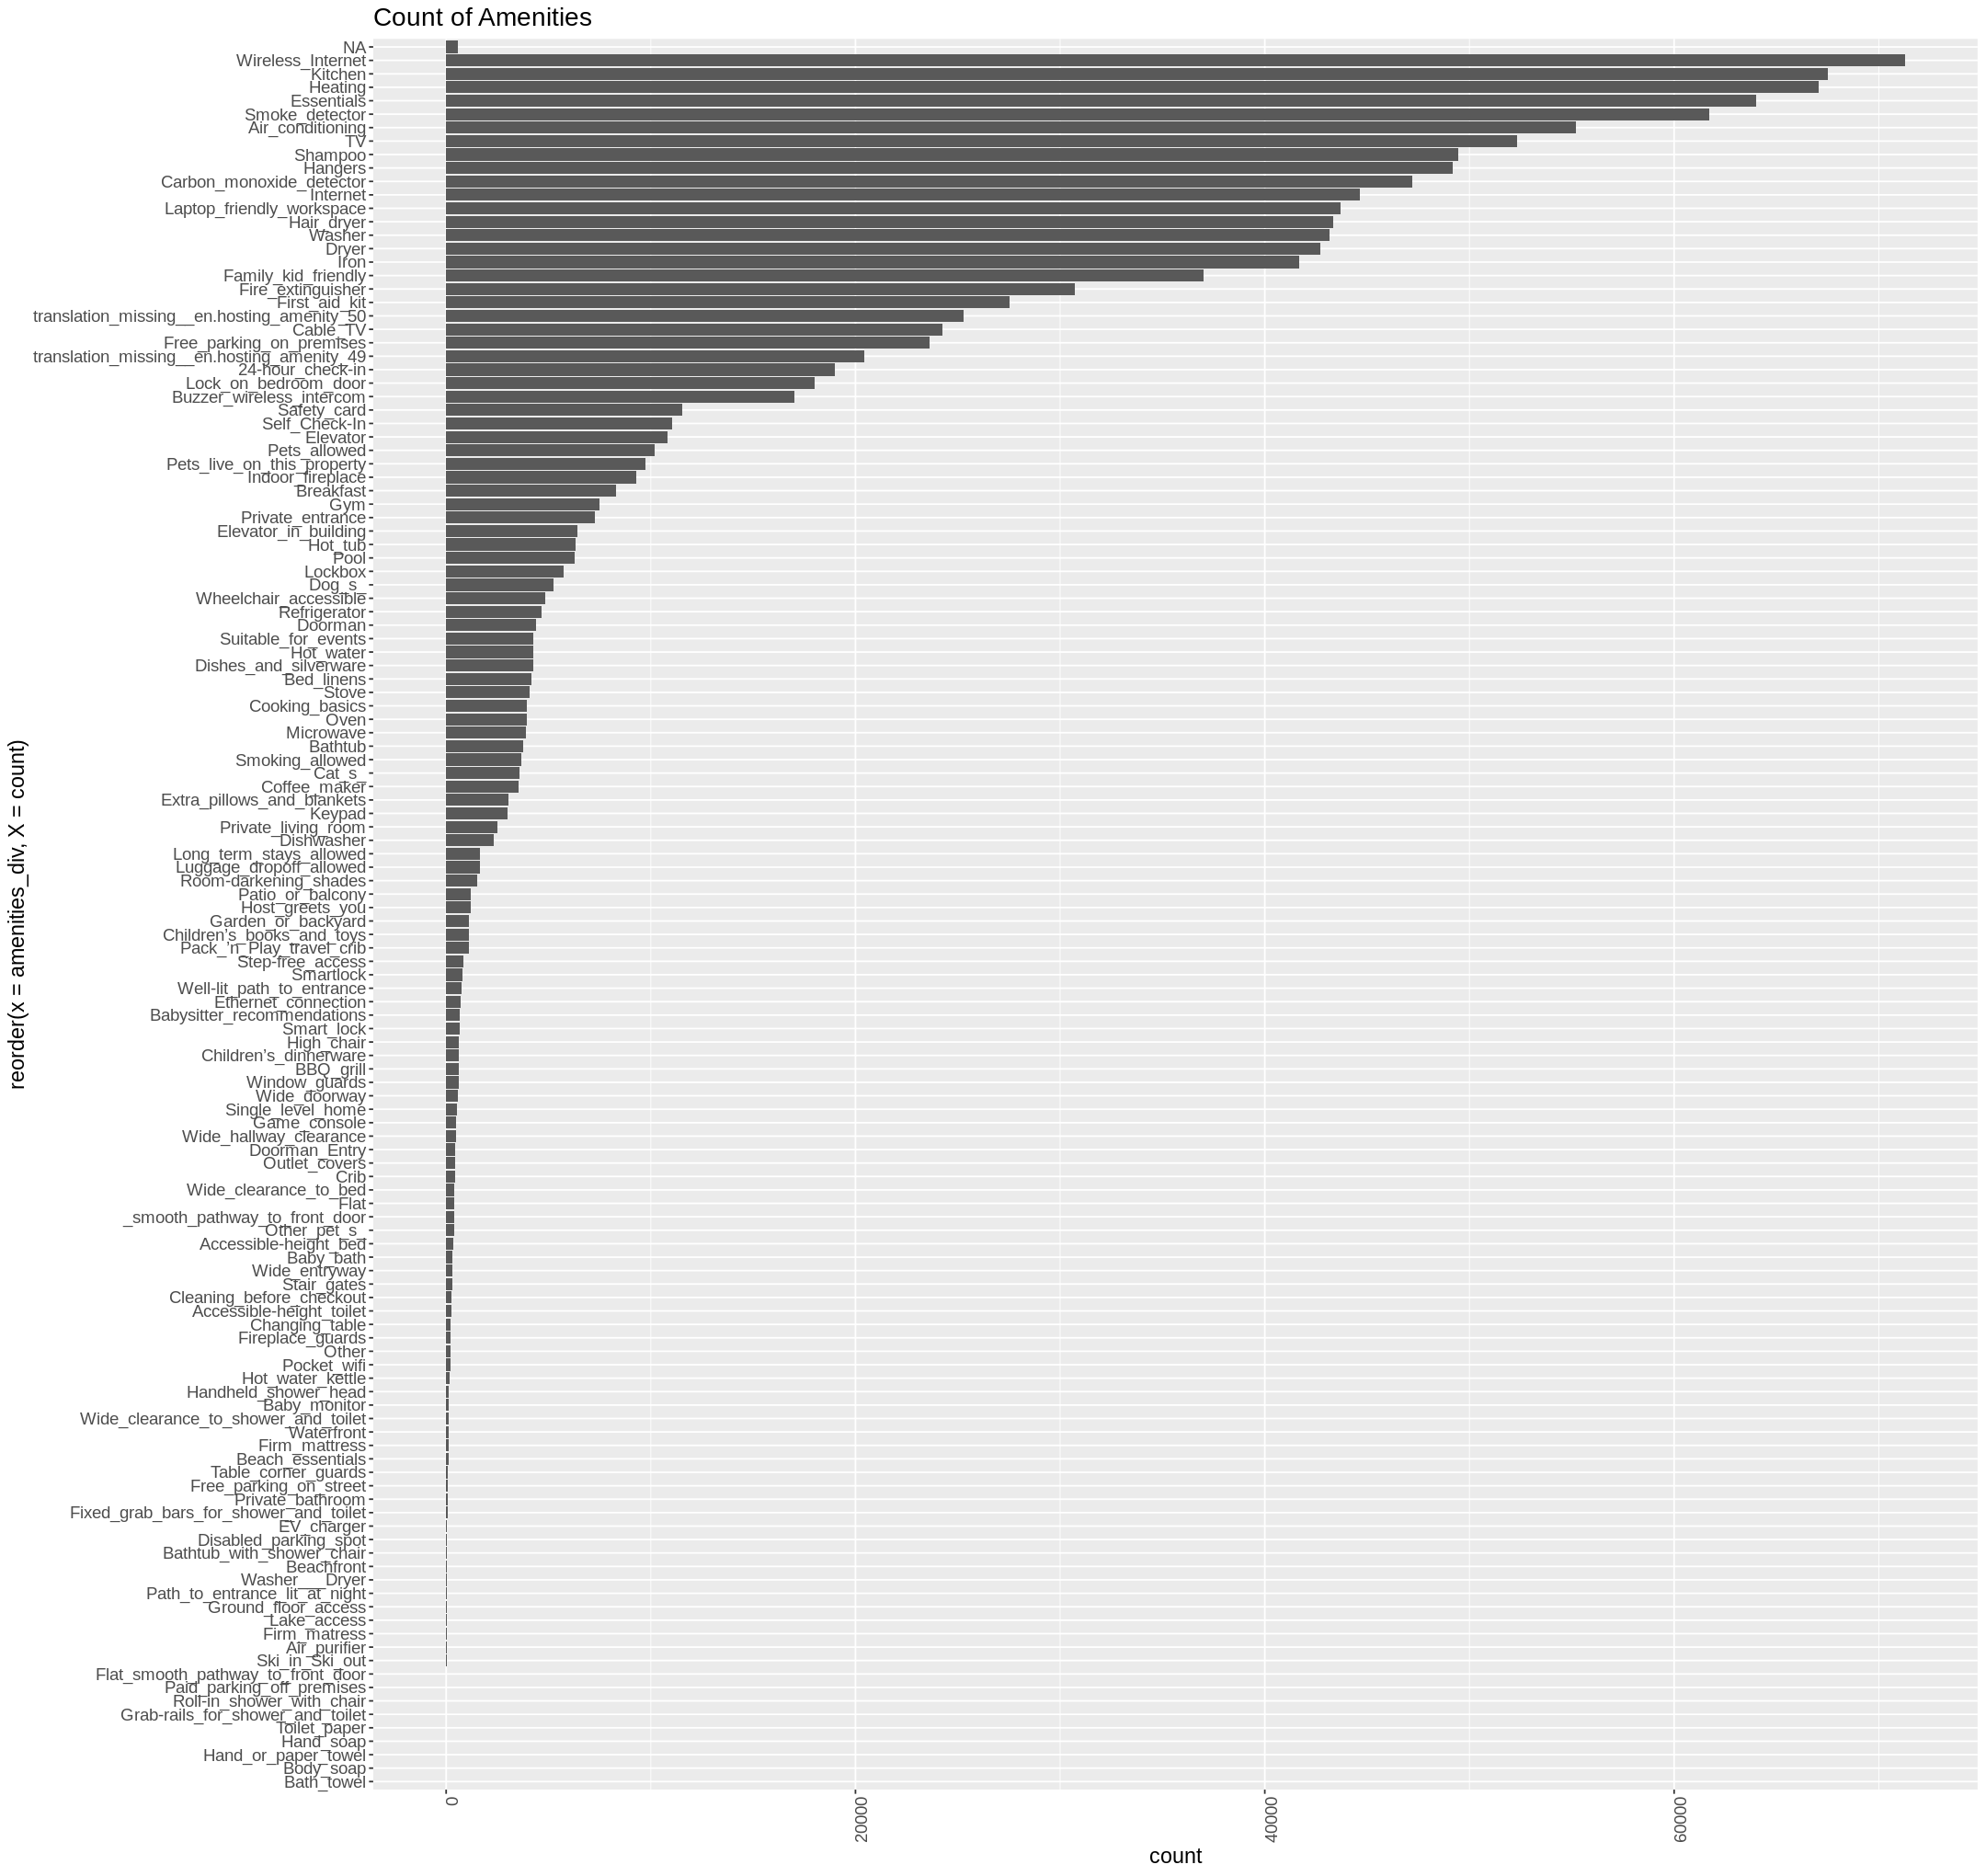

In [426]:
options(repr.plot.width=18, repr.plot.height=17)

train_test_long %>% 
  group_by(amenities_div) %>% 
#   summarise(count = n(),
#             mean_y = mean(y)) %>% # train_testをtrain単独に変えてyを基準に色分けした場合
  summarise(count = n()) %>% 
  ungroup() %>% 
  ggplot(aes(x = reorder(x = amenities_div, X = count),
             y = count)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  theme(text = element_text(size = 14)) +
  ggtitle("Count of Amenities") + 
  scale_fill_gradientn(colours = c("blue", "green"),
                       breaks=c(0, 100, 200, 300, Inf),
                       na.value = "red") +
  coord_flip()

In [427]:
# options(repr.plot.width=18, repr.plot.height=17)

# train_test_long %>% 
#   group_by(amenities_div) %>% 
#   summarise(count = n(),
#             mean_y = mean(y)) %>% 
#   ungroup() %>% 
#   ggplot(aes(x = reorder(x = amenities_div, X = count),
#              y = count,
#              fill = mean_y)) +
#   geom_bar(stat = "identity") +
#   theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
#   theme(text = element_text(size = 14)) +
#   ggtitle("Count of Amenities") + 
#   scale_fill_gradientn(colours = c("blue", "green"),
#                        breaks=c(0, 100, 200, 300, Inf),
#                        na.value = "red") +
#   coord_flip()

In [428]:
# train_test_long %>% 
#   group_by(amenities_div) %>% 
#   summarise(count = n(),
#             mean_y = mean(y)) %>% 
#   ungroup() %>% 
#   arrange(desc(mean_y)) 

In [429]:
train_test_long %>% head(1)

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,amenities_div
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<date>,<lgl>,<lgl>,<chr>,<date>,<lgl>,<date>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0,6,2,Real Bed,1,4,flexible,LA,TRUE,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,2016-07-27,TRUE,FALSE,NA,2016-07-13,FALSE,2016-07-27,33.78893,-118.1548,The Penthouse,NA,1,Apartment,60,Private room,NA,90804,TV


In [430]:
train_test_long$amenities_div %>%  unique() %>% as.data.frame()

.
<fct>
TV
Wireless_Internet
Kitchen
Free_parking_on_premises
Washer
Dryer
Smoke_detector
Cable_TV
Internet


In [431]:
# train_test_long$amenities_div[train_test_long$amenities_div == ""] <- "unkown" 

train_test <- train_test_long %>% 
#   dplyr::filter(amenities_div != "") %>%
#   distinct() %>% 
  mutate(count = 1) %>% 
  pivot_wider(id_cols = -amenities_div,
              names_from = amenities_div,
              values_from = count,
              values_fill = list( values = 0))

In [432]:
train_test %>% nrow() 

[1] 74111

In [433]:
train_test %>%  head(3)

id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,TV,Wireless_Internet,Kitchen,Free_parking_on_premises,Washer,Dryer,Smoke_detector,Cable_TV,Internet,Air_conditioning,Heating,Carbon_monoxide_detector,First_aid_kit,Essentials,Shampoo,Lock_on_bedroom_door,24-hour_check-in,Hangers,Iron,Laptop_friendly_workspace,translation_missing__en.hosting_amenity_49,translation_missing__en.hosting_amenity_50,Indoor_fireplace,Buzzer_wireless_intercom,Safety_card,Fire_extinguisher,Hair_dryer,Self_Check-In,Keypad,Lockbox,Bathtub,Room-darkening_shades,Elevator,Pets_live_on_this_property,Cat_s_,Family_kid_friendly,Smart_lock,Wheelchair_accessible,Pool,Washer___Dryer,Gym,Elevator_in_building,Hot_tub,Pets_allowed,Suitable_for_events,Hot_water,Bed_linens,Microwave,Coffee_maker,Refrigerator,Dishes_and_silverware,Cooking_basics,Oven,Stove,Private_entrance,Children’s_books_and_toys,Doorman,Dog_s_,Smoking_allowed,Breakfast,Private_living_room,Extra_pillows_and_blankets,Doorman_Entry,Long_term_stays_allowed,Host_greets_you,Outlet_covers,High_chair,Pack_’n_Play_travel_crib,Children’s_dinnerware,Other_pet_s_,Smartlock,Step-free_access,Flat,_smooth_pathway_to_front_door,Beach_essentials,Dishwasher,Private_bathroom,Window_guards,Baby_bath,Hot_water_kettle,Game_console,Table_corner_guards,BBQ_grill,Patio_or_balcony,Garden_or_backyard,Luggage_dropoff_allowed,Other,Babysitter_recommendations,Handheld_shower_head,Pocket_wifi,Wide_hallway_clearance,Wide_doorway,Well-lit_path_to_entrance,Ethernet_connection,EV_charger,Single_level_home,Cleaning_before_checkout,Wide_clearance_to_bed,Accessible-height_bed,Accessible-height_toilet,Wide_clearance_to_shower_and_toilet,Wide_entryway,NA,Fixed_grab_bars_for_shower_and_toilet,Firm_mattress,Crib,Lake_access,Stair_gates,Fireplace_guards,Air_purifier,Beachfront,Path_to_entrance_lit_at_night,Waterfront,Baby_monitor,Changing_table,Free_parking_on_street,Bathtub_with_shower_chair,Ground_floor_access,Ski_in_Ski_out,Disabled_parking_spot,Firm_matress,Flat_smooth_pathway_to_front_door,Body_soap,Hand_soap,Bath_towel,Hand_or_paper_towel,Toilet_paper,Grab-rails_for_shower_and_toilet,Paid_parking_off_premises,Roll-in_shower_with_chair
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<date>,<lgl>,<lgl>,<chr>,<date>,<lgl>,<date>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,6,2,Real Bed,1,4,flexible,LA,TRUE,My place is meant for family and a few friends who are travelling and seeking the experience of living in the food district of long beach. The hip aura of my house provides guests the urge to stay in or go see what else is special in long beach. I work in the communications department and FOH so i responde as soon as I could possibly get my hands on my phone. Yes bus and train,2016-07-27,TRUE,FALSE,NA,2016-07-13,FALSE,2016-07-27,33.78893,-118.15476,The Penthouse,NA,1,Apartment,60,Private room,NA,90804,1,1,1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA

In [434]:
write.csv(train_test, "../input/train_test.csv", row.names = F)